In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import numpy.linalg as LA
import Function as f

Setting the Hyper-Parameter:

In [2]:
max_iteration = 10000
weight_decay = 1e-5
NUM_EMPLOYEES = 20500
NUM_TRAIN = 20000
NUM_VAL = 500
Epsilons = [10,10]
NUM_FEATURES = 3
BANDWIDTH = 0.5

In [3]:
X, Y, survival_times = f.Generating_Synthetic_Set(NUM_EMPLOYEES, NUM_FEATURES, Epsilons, bias = False)

In [4]:
X_train = X[:NUM_TRAIN]
X_val = X[NUM_TRAIN:]
Y_train = Y[:NUM_TRAIN]
Y_val = Y[NUM_TRAIN:]

In [5]:
Kernel_Matrix = f.Generating_Kernel(X, "Gaussian_Kernel", BW = BANDWIDTH)
Kernel_Matrix_Train = Kernel_Matrix[:NUM_TRAIN,:NUM_TRAIN]
Kernel_Matrix_Val = Kernel_Matrix[NUM_TRAIN:,:NUM_TRAIN]

There are  382501790 pairs of samples of similarity between 0.0 and 0.1 which have an average age_gap  44.93758690122731 and the median is: 23.0
There are  14269462 pairs of samples of similarity between 0.1 and 0.2 which have an average age_gap  26.64229373188702 and the median is: 14.0
There are  7671930 pairs of samples of similarity between 0.2 and 0.3 which have an average age_gap  25.114676489488303 and the median is: 13.0
There are  4981938 pairs of samples of similarity between 0.3 and 0.4 which have an average age_gap  24.04289736243205 and the median is: 12.0
There are  3514016 pairs of samples of similarity between 0.4 and 0.5 which have an average age_gap  23.134912874614116 and the median is: 12.0
There are  2575972 pairs of samples of similarity between 0.5 and 0.6 which have an average age_gap  22.381014234626775 and the median is: 11.0
There are  1903156 pairs of samples of similarity between 0.6 and 0.7 which have an average age_gap  21.60989955631593 and the median is

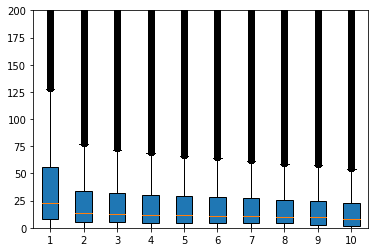

In [6]:
f.Validate_Synthetic_DataSet(Kernel_Matrix, survival_times)

Have a quick look at the distribution of ages:

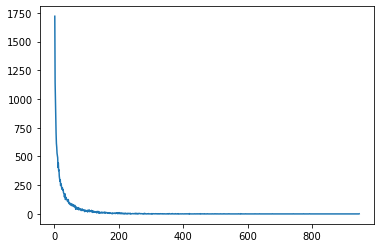

In [7]:
NUM_TASKS = Y.shape[1]
x_axis = np.arange(NUM_TASKS)+1
y_train_gt_axis = np.zeros(NUM_TASKS)
for i in range(NUM_TASKS):
    y_train_gt_axis[i] = np.sum(survival_times[:NUM_TRAIN] == x_axis[i])
plt.plot(x_axis, y_train_gt_axis)

In [ ]:
alpha = np.zeros_like(Y_train) 
predict_age = np.zeros(NUM_EMPLOYEES) 
val_loss_list = []
index = 0
for t in range(1, max_iteration+1):

    f.Kernel_Pegasos(5, Kernel_Matrix_Train, alpha, Y_train, t, weight_decay)
    
    if t%1000 == 0: 
        print("the iteration is:", t)
        hatY_train = Kernel_Matrix_Train.dot(alpha*Y_train) / ( t * weight_decay )
        
        hatY_val =  Kernel_Matrix_Val.dot(alpha*Y_train) / ( t * weight_decay )
        
        predict_age_tr = f.Ages(hatY_train)
        predict_age_val = f.Ages(hatY_val)
        predict_age = predict_age_tr + predict_age_val
            
        acc_train = np.sum(Y_train * hatY_train > 0) / (NUM_TRAIN * NUM_TASKS)
        acc_val = np.sum(Y_val * hatY_val > 0) / (NUM_VAL * NUM_TASKS)
        print("the train accuracy is:", acc_train)
        print("the val accuracy is:", acc_val)
        
        # C_index_tr = f.Calculate_C_index(survival_times[:NUM_TRAIN], predict_age_tr)
        C_index_val = f.Calculate_C_index(survival_times[NUM_TRAIN:], predict_age_val)
         
        # print("the c-index for training is:", C_index_tr)
        print("the c-index for val is:", C_index_val)
        
  
print(np.sum(predict_age[NUM_TRAIN:] == survival_times[NUM_TRAIN:])/(NUM_VAL))

the iteration is: 1000
the train accuracy is: 0.9656860084477297
the val accuracy is: 0.9650306230200634
71551 121135.0
the c-index for val is: 0.5906715647830932


In [ ]:
print(np.sum(survival_times[NUM_TRAIN:] - predict_age[NUM_TRAIN:] < 0))
print(np.sum(survival_times[NUM_TRAIN:] - predict_age[NUM_TRAIN:] > 0))
print(print(np.sum(survival_times[NUM_TRAIN:] - predict_age[NUM_TRAIN:] == 0)))
print(survival_times[NUM_TRAIN:])
print(predict_age[NUM_TRAIN:])

In [ ]:
x_axis = np.arange(NUM_TASKS)+1 # the x axis
y_train_gt_axis = np.zeros(NUM_TASKS) # the ground truth train axis
y_val_gt_axis = np.zeros(NUM_TASKS) # the groud truth validation axis 
y_train_predict_axis = np.zeros(NUM_TASKS) # the predict train axis 
y_val_predict_axis = np.zeros(NUM_TASKS) # the predict validation axis 

for i in range(NUM_TASKS):
    y_train_gt_axis[i] = np.sum(survival_times[:NUM_TRAIN] == x_axis[i])
    y_val_gt_axis[i] = np.sum(survival_times[NUM_TRAIN:] == x_axis[i])
    y_train_predict_axis[i] = np.sum(predict_age[:NUM_TRAIN] == x_axis[i])
    y_val_predict_axis[i] = np.sum(predict_age[NUM_TRAIN:] == x_axis[i])
# plt.plot(x_axis, y_train_gt_axis, x_axis, y_train_predict_axis) # the training set: ground truth vs predict situation
# plt.plot(x_axis, y_val_gt_axis, x_axis, y_val_predict_axis) # the valiadtion set: ground truth vs predictsituation
plt.plot(x_axis, y_val_predict_axis)
# plt.plot(x_axis,y_train_predict_axis,y_val_predict_axis)